In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Paths
trips_path = "../../data/Trips_2018_clean.csv"
weather_path = "../../data/Weather_Data/processed/central_park_weather_2018_meteostat_hourly.csv"

# Load trips
trips = pd.read_csv(trips_path, parse_dates=["start_time"])

# Hourly demand
trips["datetime_hour"] = trips["start_time"].dt.floor("H")
demand_hourly = (
    trips
    .groupby("datetime_hour")
    .size()
    .reset_index(name="pickups")
)

print("Trips hourly demand shape:", demand_hourly.shape)

# Load weather (το έχεις ήδη σωστά διαβασμένο όπως έδειξες)
weather = pd.read_csv(weather_path)
weather["datetime_hour"] = pd.to_datetime(weather["datetime"], errors="coerce")

print("Weather shape:", weather.shape)

# Merge demand + weather
demand_weather = demand_hourly.merge(
    weather,
    on="datetime_hour",
    how="left"
)

print("Merged shape:", demand_weather.shape)
demand_weather.head()

C:\Users\Georg\AppData\Local\Temp\ipykernel_20148\3314930166.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  trips["datetime_hour"] = trips["start_time"].dt.floor("H")


Trips hourly demand shape: (8743, 2)
Weather shape: (8761, 20)
Merged shape: (8743, 21)


,datetime_hour,pickups,datetime,temp,dwpt,rhum,prcp,snow,wdir,wspd,...,pres,tsun,coco,temp_C,pressure_inHg,wind_speed_kn,precip_in,is_rain,is_snow_like,is_dry
0,2018-01-01 00:00:00,119,2018-01-01 00:00:00,-10.6,-20.0,46.0,NaN,NaN,320.0,18.4,...,1026.7,NaN,NaN,-10.6,30.318434,9.935209,NaN,False,NaN,NaN
1,2018-01-01 01:00:00,167,2018-01-01 01:00:00,-9.4,-14.9,64.0,0.0,NaN,330.0,5.4,...,1026.7,NaN,NaN,-9.4,30.318434,2.915768,0.0,False,False,True
2,2018-01-01 02:00:00,98,2018-01-01 02:00:00,-10.0,-16.1,61.0,0.0,NaN,320.0,7.6,...,1027.0,NaN,NaN,-10.0,30.327293,4.103673,0.0,False,False,True
3,2018-01-01 03:00:00,72,2018-01-01 03:00:00,-10.6,-17.2,58.0,0.0,NaN,330.0,5.4,...,1026.8,NaN,NaN,-10.6,30.321387,2.915768,0.0,False,False,True
4,2018-01-01 04:00:00,34,2018-01-01 04:00:00,-10.6,-15.0,70.0,0.0,NaN,320.0,7.6,...,1027.1,NaN,NaN,-10.6,30.330246,4.103673,0.0,False,False,True


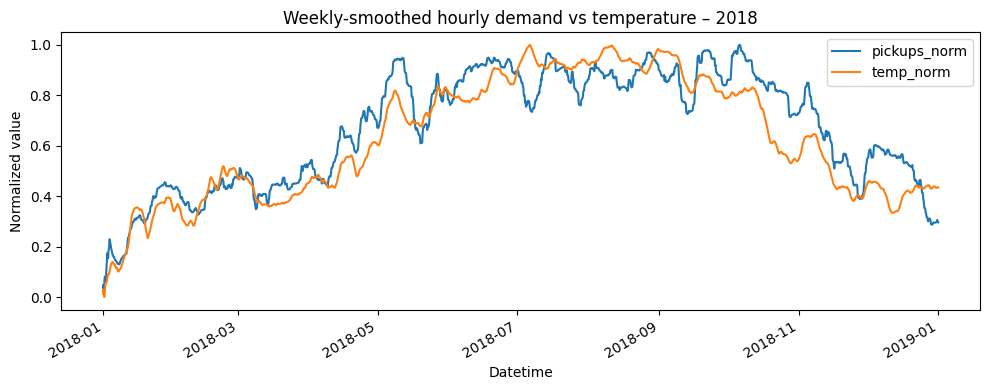

In [3]:
# Set datetime index for easy resampling / rolling
dw = demand_weather.set_index("datetime_hour")

#weekly rolling mean to clearly see the relationship   
plot_df = pd.DataFrame({
    "pickups": dw["pickups"].rolling("7D").mean(),
    "temp_C": dw["temp_C"].rolling("7D").mean(),
})

# Normalization to put them on the same scale
plot_df["pickups_norm"] = plot_df["pickups"] / plot_df["pickups"].max()
plot_df["temp_norm"] = (plot_df["temp_C"] - plot_df["temp_C"].min()) / (
    plot_df["temp_C"].max() - plot_df["temp_C"].min()
)

plt.figure(figsize=(10, 4))
plot_df[["pickups_norm", "temp_norm"]].plot(ax=plt.gca())
plt.title("Weekly-smoothed hourly demand vs temperature – 2018")
plt.ylabel("Normalized value")
plt.xlabel("Datetime")
plt.tight_layout()
plt.show()


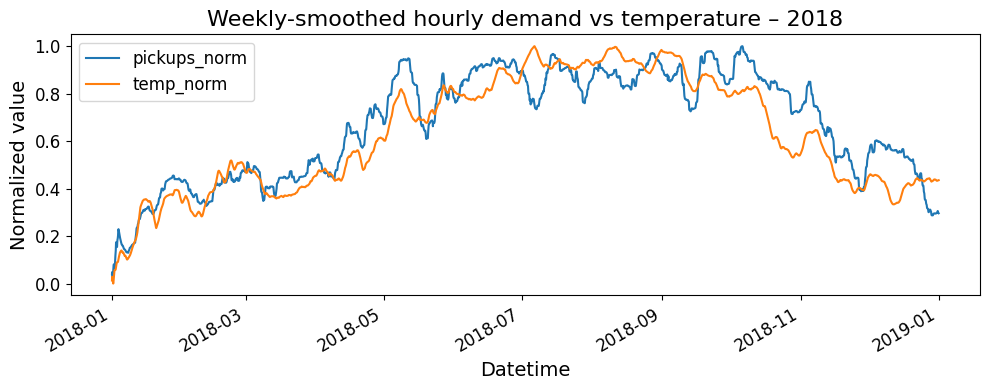

In [ ]:
plt.figure(figsize=(10, 4))

ax = plot_df[["pickups_norm", "temp_norm"]].plot(ax=plt.gca())

plt.title("Weekly-smoothed hourly demand vs temperature – 2018", fontsize=16)
plt.ylabel("Normalized value", fontsize=14)
plt.xlabel("Datetime", fontsize=14)

ax.tick_params(axis="both", labelsize=12)

ax.legend(fontsize=12)

plt.tight_layout()
plt.show()
